__Goal this week : Recommandation System__

In [1]:
'''
입출력 : 텍스트 파일 , DB , network
테이블 -> 데이터프레임 (ex: read_csv , read_excel , read_table(\t 구분자) , read_html , read_json , read_pickle)
'''

'\n입출력 : 텍스트 파일 , DB , network\n테이블 -> 데이터프레임 (ex: read_csv , read_excel , read_table(\t 구분자) , read_html , read_json , read_pickle)\n'

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('C:/data/examples/ex1.csv')
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [5]:
df = pd.read_table('C:/data/examples/ex1.csv',sep=',')
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [9]:
df2 = pd.read_csv('C:/data/examples/ex2.csv',header=None,names=list('abcde'),index_col='e')  # indexl_col=4 도 가능 숫자로.
df2

,a,b,c,d
e,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


In [13]:
mindex_df = pd.read_csv('C:/data/examples/csv_mindex.csv',index_col=['key1','key2']) # 계층적 인덱스 -> 대분류 , 중분류 같은 느낌
#mindex_df = pd.read_csv('C:/data/examples/csv_mindex.csv',index_col=[0,1]) # 가능
mindex_df

value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16

In [14]:
f = list(open('c:/data/examples/ex3.txt'))
f

['            A         B         C\n',
 'aaa -0.264438 -1.026059 -0.619500\n',
 'bbb  0.927272  0.302904 -0.032399\n',
 'ccc -0.264273 -0.386314 -0.217601\n',
 'ddd -0.871858 -0.348382  1.100491\n']

In [16]:
df3 = pd.read_table('C:/data/examples/ex3.txt',sep='\s+') # \s 정규표현식에서 공백표현
df3

,A,B,C
aaa,-0.264438,-1.026059,-0.619500
bbb,0.927272,0.302904,-0.032399
ccc,-0.264273,-0.386314,-0.217601
ddd,-0.871858,-0.348382,1.100491


In [21]:
df4 = pd.read_csv('c:/data/examples/ex4.csv',skiprows=[0,2,3]) # drop 과 혼동 X
df4
#np4 = np.loadtxt('c:/data/examples/ex4.csv',delimiter=',',skiprows=[0,2,3])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [24]:
df5 = pd.read_csv('c:/data/examples/ex5.csv')
df5.isnull()

,something,a,b,c,d,message
0,False,False,False,False,False,True
1,False,False,False,True,False,False
2,False,False,False,False,False,False


### __na_values 사용 : na_values={'누락','없음','조사안됨',...,etc}__

In [26]:
df5 = pd.read_csv('c:/data/examples/ex5.csv',na_values={'NULL'})  # {} 안에 값들은 모두 NaN 으로 처리.
df5

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [28]:
pd.read_csv('c:/data/examples/ex5.csv',na_values={'NULL','two','foo'}) # 전체에 대해서
pd.read_csv('c:/data/examples/ex5.csv',na_values={'message':'foo','something':'two'})  # 특정 컬럼에 대해서 특별 지정

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,NaN,5,6,NaN,8,world
2,three,9,10,11.0,12,NaN


__데이터를 나누어 읽기 : 데이터를 읽어들일 때 용량이 커 부담 될 때, 부분 부분 읽는 과정__

In [29]:
df6 = pd.read_csv('c:/data/examples/ex6.csv',nrows=5) # 5줄만 읽겠다
df6

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q


In [46]:
# 파일을 아예 나누어 읽기 작업할때
chunker = pd.read_csv('c:/data/examples/ex6.csv',chunksize=1000) # 1000개씩 끊어서 읽겠다.
chunker # iter-able 한 객체가 만들어짐

In [47]:
tot = pd.Series([])
for piece in chunker:
    tot=tot.add(piece['key'].value_counts(),fill_value=0)
tot

<ipython-input-47-d2672b8df0fd>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  tot = pd.Series([])


0    151.0
1    146.0
2    152.0
3    162.0
4    171.0
5    157.0
6    166.0
7    164.0
8    162.0
9    150.0
A    320.0
B    302.0
C    286.0
D    320.0
E    368.0
F    335.0
G    308.0
H    330.0
I    327.0
J    337.0
K    334.0
L    346.0
M    338.0
N    306.0
O    343.0
P    324.0
Q    340.0
R    318.0
S    308.0
T    304.0
U    326.0
V    328.0
W    305.0
X    364.0
Y    314.0
Z    288.0
dtype: float64

In [51]:
tot.sort_values(ascending=False)  # 값 기준으로 내림차순 정렬

E    368.0
X    364.0
L    346.0
O    343.0
Q    340.0
M    338.0
J    337.0
F    335.0
K    334.0
H    330.0
V    328.0
I    327.0
U    326.0
P    324.0
D    320.0
A    320.0
R    318.0
Y    314.0
G    308.0
S    308.0
N    306.0
W    305.0
T    304.0
B    302.0
Z    288.0
C    286.0
4    171.0
6    166.0
7    164.0
8    162.0
3    162.0
5    157.0
2    152.0
0    151.0
9    150.0
1    146.0
dtype: float64

In [52]:
data = pd.read_csv('c:/data/examples/ex5.csv')
data.to_csv('c:/data/examples/ex5_save_test.csv')

In [54]:
data.to_csv("c:/data/examples/ex5_save_test2.csv",sep='|')

In [59]:
data.to_csv('c:/data/examples/ex5_save_test3.csv',na_rep='누락',encoding='utf-8')

In [58]:
data.to_csv('c:/data/examples/ex5_save_test4.csv',index=False)

In [60]:
data.to_csv('c:/data/examples/ex5_save_test5.csv',index=False,header=False) # 인덱스도, 칼럼명도 다 버리고 값들만 저장

In [61]:
data.to_csv('c:/data/examples/ex5_save_test6.csv',index=False,header=False,columns=['a','b','c']) # 특정 컬럼들만 저장

__날짜 데이터 포멧팅__

In [64]:
dates = pd.date_range('8/1/2020',periods=7) # RNN : 시계열 데이터 분석 모델

ts= pd.Series(np.arange(7),index=dates)
ts.to_csv('tseries.csv',header=False)

__Json 파일 읽기/쓰기__

In [66]:
from numpy.random import randn
np.random.seed(123)
import os
import matplotlib.pyplot as plt

In [67]:
import json

In [69]:
records=[json.loads(line) for line in open('c:/data/examples/example.txt',encoding='utf-8')]
records

[{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
  'c': 'US',
  'nk': 1,
  'tz': 'America/New_York',
  'gr': 'MA',
  'g': 'A6qOVH',
  'h': 'wfLQtf',
  'l': 'orofrog',
  'al': 'en-US,en;q=0.8',
  'hh': '1.usa.gov',
  'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
  'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
  't': 1331923247,
  'hc': 1331822918,
  'cy': 'Danvers',
  'll': [42.576698, -70.954903]},
 {'a': 'GoogleMaps/RochesterNY',
  'c': 'US',
  'nk': 0,
  'tz': 'America/Denver',
  'gr': 'UT',
  'g': 'mwszkS',
  'h': 'mwszkS',
  'l': 'bitly',
  'hh': 'j.mp',
  'r': 'http://www.AwareMap.com/',
  'u': 'http://www.monroecounty.gov/etc/911/rss.php',
  't': 1331923249,
  'hc': 1308262393,
  'cy': 'Provo',
  'll': [40.218102, -111.613297]},
 {'a': 'Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 6.1; WOW64; Trident/4.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0

In [77]:
time_zones=[dic['tz'] for dic in records if 'tz' in dic]
len(time_zones)

3440

In [80]:
def get_counts(seq):
    counts={}
    for x in seq:
        if x in counts:
            counts[x]+=1
        else:
            counts[x]=1
    
    return counts

counts=get_counts(time_zones)
counts['America/New_York']

1251

In [85]:
def top_counts(count_dict,n=10):
    sort_list = sorted(count_dict.items(),key=lambda x:x[-1],reverse=True)
    ret=[sort_list[i][0] for i in range(n)]
    return ret

top_counts(counts)


# Counter 모듈 이용
from collections import Counter

count_from = Counter(time_zones)
count_from.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

# __오후__

In [90]:
records=[json.loads(line) for line in open('c:/data/examples/example.txt',encoding='utf-8')]
frame = pd.DataFrame(records)
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [92]:
frame.tz[:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [93]:
# tz 칼럼값을 기준으로 빈도수 조사
print(frame.tz.value_counts())

America/New_York                  1251
                                   521
America/Chicago                    400
America/Los_Angeles                382
America/Denver                     191
                                  ... 
Asia/Riyadh                          1
America/Argentina/Buenos_Aires       1
Europe/Volgograd                     1
Asia/Nicosia                         1
Europe/Sofia                         1
Name: tz, Length: 97, dtype: int64


In [99]:
clean_tz=frame.tz.fillna('누락')
clean_tz.value_counts()
clean_tz[clean_tz=='']='알수없음'
clean_tz.value_counts()[:10]

America/New_York       1251
알수없음                    521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
누락                      120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

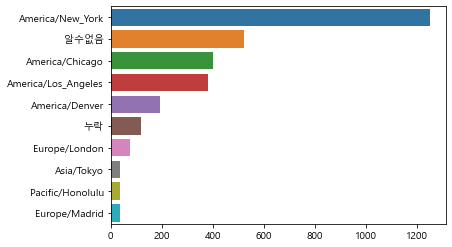

In [106]:
import seaborn as sns
subset = clean_tz.value_counts()[:10]
plt.rc('font', family='Malgun Gothic')
sns.barplot(x=subset.values,y=subset.index)

In [104]:
from matplotlib import font_manager

for font in font_manager.fontManager.ttflist:
    if 'Go' in font.name:
        print(font.name, font.fname)

Goudy Old Style C:\Windows\Fonts\GOUDOSB.TTF
Century Gothic C:\Windows\Fonts\GOTHICBI.TTF
Franklin Gothic Book C:\Windows\Fonts\FRABK.TTF
Malgun Gothic C:\Windows\Fonts\malgunsl.ttf
Century Gothic C:\Windows\Fonts\GOTHIC.TTF
Copperplate Gothic Light C:\Windows\Fonts\COPRGTL.TTF
Yu Gothic C:\Windows\Fonts\YuGothL.ttc
Franklin Gothic Heavy C:\Windows\Fonts\FRAHV.TTF
Malgun Gothic C:\Windows\Fonts\malgunbd.ttf
Century Gothic C:\Windows\Fonts\GOTHICI.TTF
Century Gothic C:\Windows\Fonts\GOTHICB.TTF
Malgun Gothic C:\Windows\Fonts\malgun.ttf
Goudy Old Style C:\Windows\Fonts\GOUDOSI.TTF
HYGothic-Medium C:\Windows\Fonts\H2GTRM.TTF
Yu Gothic C:\Windows\Fonts\YuGothR.ttc
Goudy Old Style C:\Windows\Fonts\GOUDOS.TTF
HYGothic-Extra C:\Windows\Fonts\H2GTRE.TTF
Franklin Gothic Medium Cond C:\Windows\Fonts\FRAMDCN.TTF
Goudy Stout C:\Windows\Fonts\GOUDYSTO.TTF
Franklin Gothic Book C:\Windows\Fonts\FRABKIT.TTF
Yu Gothic C:\Windows\Fonts\YuGothM.ttc
Franklin Gothic Demi Cond C:\Windows\Fonts\FRADMCN.TTF
M

In [105]:
print(np.sum(frame.a.isna()))
print('='*50)
frame.a[frame.a.isna()]

120


13      NaN
55      NaN
92      NaN
135     NaN
163     NaN
       ... 
3451    NaN
3467    NaN
3499    NaN
3518    NaN
3543    NaN
Name: a, Length: 120, dtype: object

In [107]:
# na 값들 제외
frame.a.dropna()

0       Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1                                  GoogleMaps/RochesterNY
2       Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
3       Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
4       Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
                              ...                        
3555    Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...
3556    Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...
3557                               GoogleMaps/RochesterNY
3558                                       GoogleProducer
3559    Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
Name: a, Length: 3440, dtype: object

In [110]:
Firsts = pd.Series([x.split()[0] for x in frame.a.dropna()])
Firsts[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [112]:
Firsts.value_counts()[:10]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
Dalvik/1.4.0                   3
BlackBerry8520/5.0.0.592       3
dtype: int64

In [113]:
frame.a.dropna()

0       Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1                                  GoogleMaps/RochesterNY
2       Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
3       Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
4       Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
                              ...                        
3555    Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...
3556    Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...
3557                               GoogleMaps/RochesterNY
3558                                       GoogleProducer
3559    Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
Name: a, Length: 3440, dtype: object

In [131]:
cframe=frame.copy()
len(cframe.a)
cframe['os']=np.where(cframe.a.str.contains('Windows'),'Windows','Not Windows')
cframe['os'].value_counts()

Windows        2366
Not Windows    1194
Name: os, dtype: int64

__Pandas 문자열 처리__

In [132]:
df=pd.DataFrame({'email':['happy@gmail.com',
                         '1004@daum.net',
                          'mouse@yahoo.co.kr']})
df

,email
0,happy@gmail.com
1,1004@daum.net
2,mouse@yahoo.co.kr


In [135]:
df['email'].str.split('@')
df['email'].str.title()

0      Happy@Gmail.Com
1        1004@Daum.Net
2    Mouse@Yahoo.Co.Kr
Name: email, dtype: object

In [139]:
df['email'].str.startswith(pat='h')
df['email'].str.endswith(pat='com')

0     True
1    False
2    False
Name: email, dtype: bool

In [144]:
by_tz_os=cframe.groupby(['tz','os'])
by_tz_os

In [148]:
aggcounts=by_tz_os.size().unstack(fill_value=0)
print(aggcounts)
print(aggcounts.sum(axis=1))

os                   Not Windows  Windows
tz                                       
                             245      276
Africa/Cairo                   0        3
Africa/Casablanca              0        1
Africa/Ceuta                   0        2
Africa/Johannesburg            0        1
...                          ...      ...
Europe/Volgograd               0        1
Europe/Warsaw                  1       15
Europe/Zurich                  4        0
Pacific/Auckland               3        8
Pacific/Honolulu               0       36

[97 rows x 2 columns]
tz
                       521
Africa/Cairo             3
Africa/Casablanca        1
Africa/Ceuta             2
Africa/Johannesburg      1
                      ... 
Europe/Volgograd         1
Europe/Warsaw           16
Europe/Zurich            4
Pacific/Auckland        11
Pacific/Honolulu        36
Length: 97, dtype: int64


In [149]:
aggcounts.sum(1).nlargest(10)

tz
America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
dtype: int64

# __추천시스템__  
***
```python
critics={

    'BTS':{'암수살인':5, '바울':4, '할로윈':1.5},

    '손흥민':{'바울':5, '할로윈':2},

    '레드벨벳':{'암수살인':2.5, '바울':2, '할로윈':1},

    '트와이스':{'암수살인':3.5, '바울':4, '할로윈':5}

}```  
__최종목표 : 특정사람에게 영화추천__  
* 손흥민의 암수살인 평점 예측을 위해 손흥민과 가장 유사한 취향의 사람을 찾아야한다. ( How? )  
* Euclid Distance 활용! -> 다른 영화 평점들을 벡터화 , 두 벡터의 유클리드 거리로 유사도 측정  

```python
critics = {

    '레드벨벳': {

        '택시운전사': 2.5,

        '겨울왕국': 3.5,

        '리빙라스베가스': 3.0,

        '넘버3': 3.5,

        '사랑과전쟁': 2.5,

        '세계대전': 3.0,

    },

    'BTS': {

        '택시운전사': 1.0,

        '겨울왕국': 4.5,

        '리빙라스베가스': 0.5,

        '넘버3': 1.5,

        '사랑과전쟁': 4.5,

        '세계대전': 5.0,

    },

    '블랙핑크': {

        '택시운전사': 3.0,

        '겨울왕국': 3.5,

        '리빙라스베가스': 1.5,

        '넘버3': 5.0,

        '세계대전': 3.0,

        '사랑과전쟁': 3.5,

    },

    '소녀시대': {

        '택시운전사': 2.5,

        '겨울왕국': 3.0,

        '넘버3': 3.5,

        '세계대전': 4.0,

    },

    '마마무': {

        '겨울왕국': 3.5,

        '리빙라스베가스': 3.0,

        '세계대전': 4.5,

        '넘버3': 4.0,

        '사랑과전쟁': 2.5,

    },

    '오마이걸': {

        '택시운전사': 3.0,

        '겨울왕국': 4.0,

        '리빙라스베가스': 2.0,

        '넘버3': 3.0,

        '세계대전': 3.5,

        '사랑과전쟁': 2.0,

    },

    '모모랜드': {

        '택시운전사': 3.0,

        '겨울왕국': 4.0,

        '세계대전': 3.0,

        '넘버3': 5.0,

        '사랑과전쟁': 3.5,

    },

    '우주소녀': {'겨울왕국': 4.5, '사랑과전쟁': 1.0,

             '넘버3': 4.0},

}
```

__1.손흥민과 가장 가까운 사람? 거리?__  
__2.블랙핑크와 가장 가까운 사람? 거리?__  
__3.블랙핑크와 다른 그룹 사이의 상관계수?__  